In [1]:
#Spike Challenge - Predicción de precios de insumos básicos en Chile


C:\Users\Pablo.Ferreiro\Desktop\Spike


In [1]:
#librerias 
import pandas as pd
pd.set_option('mode.chained_assignment',None)


In [2]:
##1. Datos: Precipitaciones, Indicadores Económicos Banco Central 

precipitaciones = pd.read_csv(r'precipitaciones.csv')
precipitaciones['date'] = pd.to_datetime(precipitaciones['date'], format='%Y-%m-%d')
precipitaciones.info()
precipitaciones.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 496 non-null    datetime64[ns]
 1   Coquimbo                             496 non-null    float64       
 2   Valparaiso                           496 non-null    float64       
 3   Metropolitana_de_Santiago            496 non-null    float64       
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64       
 5   Maule                                496 non-null    float64       
 6   Biobio                               496 non-null    float64       
 7   La_Araucania                         496 non-null    float64       
 8   Los_Rios                             496 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 35.0 KB


,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [3]:
bc = pd.read_csv(r'banco_central.csv')
bc.info()
bc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


In [5]:
##2. Análisis de datos. Creación de variables

precipitaciones.describe()

'''
Como ha de esperarse, la media de precipitaciones crece de norte a sur. 
Lo mismo sucede con su desviación estándar, lo que indica que los eventos "más" extremos de
precipitaciones se intensifican hacia el sur (mayor dispersión). Lo anterior se confirma revisando
las precipitaciones máximas de cada región, aunque desde la región de O'Higgins al sur la máxima 
oscila entre los 650 mm y 760 mm aprox.
La mediana se comporta de la misma forma que la media (creciente de norte a sur). 
Según lo que se muestra más arriba (precipitacines.info()) son 496 valores no-nulos para todas las 
columnas.
Finalmente, se puede observar que existen diferencias relativas importantes entre la media de 
precipitaciones y su mediana (50%), por ejemplo, entre Coquimbo y O'Higgins la media puede ser hasta 4 
veces la mediana. Aunque, de norte a sur, estas diferencias relativas disminuyen.
'''

'\nComo ha de esperarse, la media de precipitaciones crece de norte a sur. \nLo mismo sucede con su desviación estándar, lo que indica que los eventos "más" extremos de\nprecipitaciones se intensifican hacia el sur (mayor dispersión). Lo anterior se confirma revisando\nlas precipitaciones máximas de cada región, aunque desde la región de O\'Higgins al sur la máxima \noscila entre los 650 mm y 760 mm aprox.\nLa mediana se comporta de la misma forma que la media (creciente de norte a sur). \nSegún lo que se muestra más arriba (precipitacines.info()) son 496 valores no-nulos para todas las \ncolumnas.\nFinalmente, se puede observar que existen diferencias relativas importantes entre la media de \nprecipitaciones y su mediana (50%), por ejemplo, entre Coquimbo y O\'Higgins la media puede ser hasta 4 \nveces la mediana. Aunque, de norte a sur, estas diferencias relativas disminuyen.\n'

In [6]:
bc.describe()


,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


In [8]:
'''
Lo primero que se debe notar viendo el output de bc.info() es que para una porción alta de las columnas
tenemos pocos valores no-nulos. En otras su Dtype es "object", esto suele significar que sus valores son
str (strings) y no float o int. Viendo la base, es fácil darse cuenta que este problema ocurre por 
la transformación del punto como separador de miles, cuando usualmente en lenguajes de programación
o programas estadísticos el punto se reconoce como separador decimal. Además de esto, se puede notar
que varios elementos de las series pareciera faltar uno o dos dígitos, habría que explorar si esto se debe
a un error en la base de datos, a series que no están estacionalizadas u otro factor.
Viendo las variables que si fueron reconocidas como numéricas o decimales, se puede notar que la base
de datos no está balanceada en cuanto a disponibilidad de observaciones para cada columna (variable).
Se tratan de series de precios de commodities en diferentes magnitudes y monedas.

'''

'\nLo primero que se debe notar viendo el output de bc.info() es que para una porción alta de las columnas\ntenemos pocos valores no-nulos. En otras su Dtype es "object", esto suele significar que sus valores son\nstr (strings) y no float o int. Viendo la base, es fácil darse cuenta que este problema ocurre por \nla transformación del punto como separador de miles, cuando usualmente en lenguajes de programación\no programas estadísticos el punto se reconoce como separador decimal. Además de esto, se puede notar\nque varios elementos de las series pareciera faltar uno o dos dígitos, habría que explorar si esto se debe\na un error en la base de datos, a series que no están estacionalizadas u otro factor.\nViendo las variables que si fueron reconocidas como numéricas o decimales, se puede notar que la base\nde datos no está balanceada en cuanto a disponibilidad de observaciones para cada columna (variable).\nSe tratan de series de precios de commodities en diferentes magnitudes y monedas.

In [9]:
bc.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

In [10]:
ind_list = bc.select_dtypes('object').columns.drop('Periodo')
for col in ind_list:
    bc[col] = pd.to_numeric(bc[col].apply(lambda x: str(x).replace('.','')), errors='coerce')


In [11]:
bc.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.010000e+02,3.000000e+02,3.000000e+02,3.000000e+02,9.500000e+01,...,4.200000e+02,1.440000e+02,3.720000e+02,8.400000e+01,3.600000e+02,2.640000e+02,8.400000e+01,8.400000e+01,8.500000e+01,145.000000
mean,5.046252e+08,6.126781e+08,6.427296e+08,6.118681e+08,5.586226e+08,4.607443e+08,4.415409e+08,4.946213e+08,4.803953e+08,3.118088e+08,...,6.110122e+08,6.123593e+08,6.113709e+08,1.909856e+08,5.753681e+08,3.889683e+08,3.125472e+08,3.354685e+08,3.292469e+08,26694.082759
std,3.189728e+08,3.462268e+08,3.788515e+08,3.456781e+08,3.133111e+08,2.950883e+08,3.069863e+08,3.203694e+08,3.125411e+08,1.861193e+08,...,3.960804e+08,4.137558e+08,3.299558e+08,2.779830e+08,3.428082e+08,2.054001e+08,3.694470e+08,3.806571e+08,3.707435e+08,7170.231956
min,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,...,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,4658.000000
25%,1.096875e+08,1.099378e+08,1.065761e+08,1.067046e+08,1.295278e+08,1.213123e+08,1.094721e+08,1.085601e+08,1.102778e+08,1.777814e+08,...,1.052936e+08,1.039881e+08,3.494149e+08,1.020393e+08,1.063659e+08,3.217942e+08,1.038095e+08,1.024565e+08,1.086760e+08,23701.000000
50%,5.648566e+08,7.525221e+08,8.620268e+08,7.373487e+08,6.346444e+08,4.448286e+08,4.792928e+08,5.716117e+08,5.223304e+08,2.676265e+08,...,8.747064e+08,8.886748e+08,7.588509e+08,1.058928e+08,6.818570e+08,4.463534e+08,1.109440e+08,1.061352e+08,1.330445e+08,27912.000000
75%,7.769170e+08,8.856701e+08,9.427714e+08,8.882717e+08,8.123019e+08,6.669935e+08,6.862097e+08,7.596344e+08,7.498437e+08,3.976205e+08,...,9.336268e+08,9.658443e+08,9.061646e+08,1.098754e+08,8.793629e+08,5.503250e+08,3.019501e+08,8.276680e+08,7.964341e+08,31800.000000
max,9.998748e+08,9.992728e+08,9.975769e+08,9.992121e+08,9.995847e+08,9.971810e+08,9.964286e+08,9.981539e+08,9.972512e+08,7.046145e+08,...,9.987790e+08,9.996066e+08,9.994139e+08,9.991563e+08,9.999838e+08,6.684895e+08,9.996093e+08,9.986254e+08,9.988942e+08,39263.000000


In [12]:
bc['Periodo'] = pd.to_datetime(bc['Periodo'], format='%Y-%d-%m  %H:%M:%S %Z', utc=False)
bc['Periodo2'] = bc['Periodo'].dt.date.astype(str)
bc['Periodo2'][bc['Periodo2']=='2020-01-13'] = '2020-01-12'
bc_f = bc.drop_duplicates()
bc_f #No se eliminaran los valores perdidos o vacíos hasta saber cuál será el set final de variables

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Periodo2
0,2013-01-03 00:00:00+00:00,102796218.0,10546824.0,978554365.0,102297537.0,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,...,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0,2013-01-03
1,2013-01-04 00:00:00+00:00,101664842.0,999272757.0,927333293.0,104485589.0,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,...,968087179.0,914276663.0,NaN,104545429.0,544815032.0,NaN,NaN,NaN,32206.0,2013-01-04
2,2013-01-05 00:00:00+00:00,101642954.0,993959922.0,96133164.0,105445361.0,968789055.0,100462117.0,104083216.0,101953299.0,102322796.0,...,978471874.0,966913278.0,NaN,99468801.0,56891916.0,NaN,NaN,NaN,31589.0,2013-01-05
3,2013-01-06 00:00:00+00:00,998310201.0,968367884.0,102400933.0,999212106.0,89190493.0,939504414.0,103857161.0,100222381.0,995139235.0,...,966647135.0,981820974.0,NaN,94969678.0,56594867.0,NaN,NaN,NaN,28457.0,2013-01-06
4,2013-01-07 00:00:00+00:00,964696194.0,961051418.0,980029022.0,100882112.0,901785886.0,92776599.0,969309272.0,962069134.0,962804305.0,...,100100749.0,990198382.0,NaN,102128977.0,586329899.0,NaN,NaN,NaN,31736.0,2013-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-01-08 00:00:00+00:00,792872358.0,809540557.0,844433727.0,862655599.0,721027743.0,640625573.0,829163596.0,799073886.0,786659097.0,...,NaN,847665895.0,NaN,905764363.0,475746478.0,NaN,NaN,NaN,NaN,2008-01-08
610,2008-01-09 00:00:00+00:00,786802278.0,814228983.0,875931483.0,85990071.0,693602068.0,629581947.0,810645789.0,791396405.0,772867447.0,...,NaN,859131907.0,NaN,894789858.0,453055435.0,NaN,NaN,NaN,NaN,2008-01-09
611,2008-01-10 00:00:00+00:00,841834519.0,896565998.0,980164017.0,889145021.0,79386738.0,653517611.0,856040952.0,85038187.0,818131883.0,...,NaN,902538952.0,NaN,981854401.0,478309081.0,NaN,NaN,NaN,NaN,2008-01-10
612,2008-01-11 00:00:00+00:00,82846325.0,845666687.0,864252442.0,83063253.0,843834773.0,638884202.0,881094389.0,838436575.0,825672572.0,...,NaN,877968927.0,NaN,914543986.0,466174958.0,NaN,NaN,NaN,NaN,2008-01-11


In [13]:
#3. Visualización
from matplotlib import pyplot
import numpy as np

In [14]:
def plot_precip(fech_inic, fech_fin, *region):
    global precipitaciones
    precip = precipitaciones

    for reg in region:
        if reg not in precipitaciones.columns:
            raise NameError('El nombre de región es incorrecto o está mal escrito')
        else:
            pass
    
    try:
        f_in = pd.to_datetime(fech_inic, format='%Y-%m-%d')
        f_fin = pd.to_datetime(fech_fin, format='%Y-%m-%d')
    except:
        raise NameError('Formato de fecha incorrecto, formato ejemplo: 2018-12-24')
        
    if not (f_in == precip['date']).any() or not (f_fin == precip['date']).any():
        raise NameError('Las fechas ingresadas no existen en los datos.')
    else:
        pass

    precip_ = precip[(precip['date']>=f_in) & (precip['date']<=f_fin)]
    precip_.plot('date', list(region))
    pyplot.show()
    return None



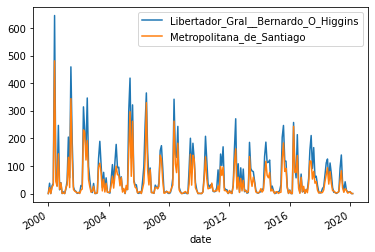

In [15]:
plot_precip( '2000-01-01', '2020-03-01', 'Libertador_Gral__Bernardo_O_Higgins', 'Metropolitana_de_Santiago')

In [23]:
'''
La proximidad entre ambas regiones explica que las tendencias en precipitaciones para las fechas
seleccionadas es casi la misma. Existe una leve diferencia en el volumen (llueve un poco más en
O'Higgins), pero las estaciones, lluvias y sequías tienen un comportamiento muy similar. Se pueden
observar periodos de tiempo donde la diferencia de volumen entre ambas regiones es mayor (2000-2006)
y otros donde es bastante menor (2014-2017). En ambas regiones, la tendencia general es a una 
baja en las precipitaciones.
'''

"\nLa proximidad entre ambas regiones explica que las tendencias en precipitaciones para las fechas\nseleccionadas es casi la misma. Existe una leve diferencia en el volumen (llueve un poco más en\nO'Higgins), pero las estaciones, lluvias y sequías tienen un comportamiento muy similar. Se pueden\nobservar periodos de tiempo donde la diferencia de volumen entre ambas regiones es mayor (2000-2006)\ny otros donde es bastante menor (2014-2017). En ambas regiones, la tendencia general es a una \nbaja en las precipitaciones.\n"

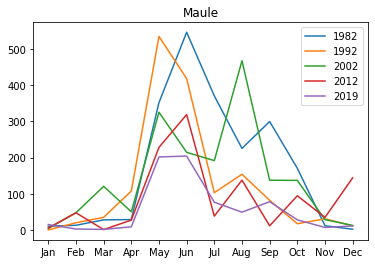

In [24]:
def plot_precip2(region: str, *agnos):
    global precipitaciones
    precip = precipitaciones
    precip.loc[:,:].sort_values(by="date", inplace=True)
    
    for ag in agnos:
        f_in = pd.to_datetime(str(ag)+'-01-01', format='%Y-%m-%d')
        f_fin = pd.to_datetime(str(ag)+'-12-01', format='%Y-%m-%d')
        precip_ = precip[(precip['date']>=f_in) & (precip['date']<=f_fin)].copy()
        precip_.loc[:,'date'] = pd.to_datetime(precip_.loc[:,'date'].copy(), format='%m').dt.month_name().str.slice(stop=3)
        pyplot.plot(precip_['date'], precip_[region])
    pyplot.legend(agnos)
    pyplot.title(region)
    pyplot.show()
    
plot_precip2('Maule',  1982, 1992, 2002, 2012, 2019)

In [25]:
'''
Lo primero que destaca es la evidente tendencia a la baja en las precipitaciones en cada decenio.
También es curioso el desplazamiento de peak de lluvias que ocurre el 2002 de mayo-julio a agosto.
Finalmente, hay una relativa convergencia en las precipitaciones durante los meses secos (a excepción
de fines del 2012)
'''

'\nLo primero que destaca es la evidente tendencia a la baja en las precipitaciones en cada decenio.\nTambién es curioso el desplazamiento de peak de lluvias que ocurre el 2002 de mayo-julio a agosto.\nFinalmente, hay una relativa convergencia en las precipitaciones durante los meses secos (a excepción\nde fines del 2012)\n'

In [143]:
def series_bc(fech_inic, fech_fin, *series):
    global bc_f
    bcf = bc_f
    bcf.loc[:,:].sort_values(by="Periodo2", inplace=True)
    bcf['Periodo2'] = pd.to_datetime(bcf['Periodo2'], format='%Y-%m-%d')
    
    try:
        f_in = pd.to_datetime(fech_inic, format='%Y-%m-%d')
        f_fin = pd.to_datetime(fech_fin, format='%Y-%m-%d')
    except:
        raise NameError('Formato de fecha incorrecto, formato ejemplo: 2018-25-12 / Año-dia-mes ') #Error si hay formato errado
    
    if not (f_in == bcf['Periodo2']).any() or not (f_fin == bcf['Periodo2']).any():
        raise NameError('Las fechas ingresadas no existen en los datos.') #Error si fechas no existen
    else:
        pass
    
    bcf_ = bcf[(bcf['Periodo2']>=f_in) & (bcf['Periodo2']<=f_fin)].copy()
    bcf_.loc[:,'Periodo2'] = pd.to_datetime(bcf_.loc[:,'Periodo2'].copy(), format='%Y-%d-%m').dt.to_period('m')

    for sr in series:
        pyplot.plot(bcf_[sr].values)
    pyplot.xticks(range(len(bcf_['Periodo2'])), bcf_['Periodo2'])
    pyplot.xticks(rotation=90)
    pyplot.locator_params(axis='x', nbins=10)
    pyplot.legend(series)
    pyplot.title('Series BC')
    
    pyplot.show()
    


In [144]:
#Dado el problema con datos señalado anteriormente, se hará una corrección 'Manual' de los datos agregando
# un cero al final de los valores 'aberrantes' que se detecten.
bc_f['PIB_Servicios_financieros'][bc_f['PIB_Servicios_financieros']<=9000000] = bc_f['PIB_Servicios_financieros'][bc_f['PIB_Servicios_financieros']<=9000000].copy()*100
bc_f['PIB_Servicios_financieros'][bc_f['PIB_Servicios_financieros']<=90000000] = bc_f['PIB_Servicios_financieros'][bc_f['PIB_Servicios_financieros']<=90000000].copy()*10
bc_f['PIB_Agropecuario_silvicola'][bc_f['PIB_Agropecuario_silvicola']<90000000] = bc_f['PIB_Agropecuario_silvicola'][bc_f['PIB_Agropecuario_silvicola']<90000000].copy()*10

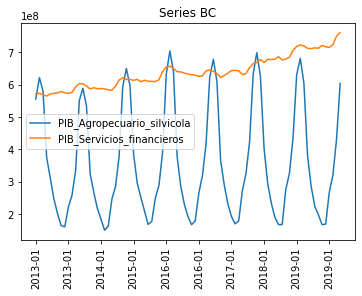

In [145]:
series_bc('2013-01-01', '2020-01-01', 'PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros')


In [108]:
'''
Para el periodo estudiado (2013-2020), se puede observar tendencia al alza en la serie de datos respecto
al PIB de Servicios Financieros, salvo un estancamiento entre el 2016 y 2017 y una caída en el tercer 
mes del 2020 (probablemente la pandemia). 
En el caso del PIB Agropecuario-silvícola, tenemos el caso de una serie que depende de las estaciones.
Esto hace muy difícil la comparabilidad entre ambas. Si bien se pueden observar cambios en los picos y 
caídas de cada año, lo correcto sería desestacionalizar la serie para separar sus variaciones de su 
tendencia general. El filtro de Hodrick-Prescott entre otros puede resultar útil.

'''

'\nPara el periodo estudiado (2013-2020), se puede observar tendencia al alza en la serie de datos respecto\nal PIB de Servicios Financieros, salvo un estancamiento entre el 2016 y 2017 y una caída en el tercer \nmes del 2020 (probablemente la pandemia). \nEn el caso del PIB Agropecuario-silvícola, tenemos el caso de una serie que depende de las estaciones.\nEsto hace muy difícil la comparabilidad entre ambas. Si bien se pueden observar cambios en los picos y \ncaídas de cada año, lo correcto sería desestacionalizar la serie para separar sus variaciones de su \ntendencia general. El filtro de Hodrick-Prescott entre otros puede resultar útil.\n\n'

In [24]:
##4. Tratamiento y creación de variables

In [187]:
'''
Existen varios métodos para medir correlación entre variables 
(Pearson o Spearman), pero  cuando se trabaja con series de 
tiempo, existe la posibilidad de que la correlación entre 
variables ocurra con rezagos. Para evitar este problema (que 
puede derivar en regresiones espurias), se puede usar la 
correlación cruzada (crosscorrelation). Un supuesto para este
tipo de correlación es que las series sean estacionarias (media y
varianza que no varían en el tiempo). Esto es otra forma de decir
que las series podrían estar autocorrelacionadas y por lo tanto 
la correlación no sería entre las variables sino con sus propios
rezagos (se suelen utilizar los autocorreleogramas).
En resumen, se necesita que las series sean estacionarias (autocorrelación
baja dependiendo del número de rezagos considerados), para evitar
regresiones espurias. Luego entre las series de tiempo, la correlación
depende si se trata de variables independientes y del regresor que se utilice.
En el caso de la regresión lineal (MCO), existen una serie de supuestos
de las variables independientes (multicolinealidad, dependencia lineal,
independencia del error -endogeneidad-, homocedasticidad, etc.)
que nos permiten determinar si los coeficientes estimados están
sesgados o no. En resumen, es preferible que variables independientes
no estén correlacionadas. Digo "preferible" porque en una publicación
académica en econometría esto sería un problema grande, pero en muchos
manuales de Machine Learning no se hacen referencias a estos supuestos,
probablemente grandes aplicaciones basadas en grandes cantidades de datos
omiten estos supuestos, dado el volumen de los datos y la predictibilidad
de los modelos.

'''

'\nExisten varios métodos para medir correlación entre variables \n(Pearson o Spearman), pero  cuando se trabaja con series de \ntiempo, existe la posibilidad de que la correlación entre \nvariables ocurra con rezagos. Para evitar este problema (que \npuede derivar en regresiones espurias), se puede usar la \ncorrelación cruzada (crosscorrelation). Un supuesto para este\ntipo de correlación es que las series sean estacionarias (media y\nvarianza que no varían en el tiempo). Esto es otra forma de decir\nque las series podrían estar autocorrelacionadas y por lo tanto \nla correlación no sería entre las variables sino con sus propios\nrezagos (se suelen utilizar los autocorreleogramas).\nEn resumen, se necesita que las series sean estacionarias (autocorrelación\nbaja dependiendo del número de rezagos considerados), para evitar\nregresiones espurias. Luego entre las series de tiempo, la correlación\ndepende si se trata de variables independientes y del regresor que se utilice.\nEn el caso 

In [146]:
pleche =  pd.read_csv(r'precio_leche.csv')
pleche.describe()

,Anio,Precio_leche
count,506.000000,506.000000
mean,1999.584980,114.444980
std,12.183973,78.999882
min,1979.000000,3.850000
25%,1989.000000,48.162500
50%,2000.000000,102.250000
75%,2010.000000,189.175000
max,2021.000000,318.880000


In [147]:
pleche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [148]:
#Variables temporales
pleche['mes_'] = ''
pleche['dia_'] = '01'
pleche['anio_'] = pleche['Anio'].astype(str)
pleche.loc[:,'mes_'][pleche['Mes']=='Ene'] = '01'
pleche.loc[:,'mes_'][pleche['Mes']=='Feb'] = '02'
pleche.loc[:,'mes_'][pleche['Mes']=='Mar'] = '03'
pleche.loc[:,'mes_'][pleche['Mes']=='Abr'] = '04'
pleche.loc[:,'mes_'][pleche['Mes']=='May'] = '05'
pleche.loc[:,'mes_'][pleche['Mes']=='Jun'] = '06'
pleche.loc[:,'mes_'][pleche['Mes']=='Jul'] = '07'
pleche.loc[:,'mes_'][pleche['Mes']=='Ago'] = '08'
pleche.loc[:,'mes_'][pleche['Mes']=='Sep'] = '09'
pleche.loc[:,'mes_'][pleche['Mes']=='Oct'] = '10'
pleche.loc[:,'mes_'][pleche['Mes']=='Nov'] = '11'
pleche.loc[:,'mes_'][pleche['Mes']=='Dic'] = '12'


In [149]:
pleche['date'] = pleche[['dia_', 'mes_', 'anio_']].agg('-'.join, axis=1) # Variable en formato Datetime
pleche['date'] = pd.to_datetime(pleche['date'], format='%d-%m-%Y')

In [150]:
bc_f['Periodo2'].head()
bc_f['date'] = pd.to_datetime(bc_f['Periodo2'], format='%Y-%m-%d', utc=False)
bc_f['date'] = bc_f['date'].dt.strftime('%Y-%d-%m')
bc_f['date']



146    1970-01-01
147    1970-02-01
148    1970-03-01
149    1970-04-01
150    1970-05-01
          ...    
92     2020-08-01
93     2020-09-01
94     2020-10-01
145    2020-11-01
89     2020-12-01
Name: date, Length: 612, dtype: object

In [151]:
bc_f['date'] =  pd.to_datetime(bc_f['date'], format='%Y-%m-%d', utc=True)
pleche['date'] = pd.to_datetime(pleche['date'], utc=True)
precipitaciones['date'] =  pd.to_datetime(precipitaciones['date'], utc=True)
df = pleche.merge(precipitaciones, on='date')
df = df.merge(bc_f, on='date').reset_index(drop=True)
df

,Anio,Mes,Precio_leche,mes_,dia_,anio_,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,...,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Periodo2
0,1979,Ene,3.85,01,01,1979,1979-01-01 00:00:00+00:00,2.641948,0.587062,2.447114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-01
1,1979,Feb,4.58,02,01,1979,1979-02-01 00:00:00+00:00,1.179804,2.432192,3.997852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-02
2,1979,Mar,5.18,03,01,1979,1979-03-01 00:00:00+00:00,0.255490,0.020601,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-03
3,1979,Abr,6.06,04,01,1979,1979-04-01 00:00:00+00:00,10.173699,11.745779,13.722349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-04
4,1979,May,7.25,05,01,1979,1979-05-01 00:00:00+00:00,1.039098,18.609286,50.187148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2019,Dic,253.86,12,01,2019,2019-12-01 00:00:00+00:00,0.287895,0.165390,3.601443,...,111252144.0,114377499.0,108484149.0,108803992.0,67864.0,146293085.0,139938562.0,173115611.0,31090.0,2019-01-12
492,2020,Ene,254.10,01,01,2020,2020-01-01 00:00:00+00:00,3.299797,2.003685,6.937148,...,101007846.0,926196774.0,111139827.0,106953412.0,67982.0,10990377.0,106139507.0,125792769.0,32104.0,2020-01-01
493,2020,Feb,270.15,02,01,2020,2020-02-01 00:00:00+00:00,0.179216,0.003701,0.032064,...,973346365.0,914239245.0,105197492.0,101356894.0,63682.0,109187214.0,107607749.0,115854156.0,25025.0,2020-01-02
494,2020,Mar,279.88,03,01,2020,2020-03-01 00:00:00+00:00,0.003451,0.000666,0.000000,...,105057936.0,975494911.0,10913508.0,111534401.0,67645.0,101811696.0,102108611.0,100558413.0,19177.0,2020-01-03


In [152]:
df_a = df.groupby(pd.Grouper(key='date', freq="Y")).sum() # Modelo anualizado
df_a['Precio_leche'] = df_a['Precio_leche']/12 #Precio promedio del año
df_tri = df.groupby(pd.Grouper(key='date', freq="Q")).sum() #Modelo por trimestre
df_tri['Precio_leche'] = df_tri['Precio_leche']/4 #Precio promedio trimestral
df_lag1 = pd.concat([df['Precio_leche'], df.loc[:, df.columns != 'Precio_leche'].shift(1)], axis=1) # Modelo con lag de un mes
df_lag1 
#los datos de df son mensuales, por lo que se hará una agrupación por el mes


,Precio_leche,Anio,Mes,mes_,dia_,anio_,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,...,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos,Periodo2
0,3.85,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,4.58,1979.0,Ene,01,01,1979,1979-01-01 00:00:00+00:00,2.641948,0.587062,2.447114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-01
2,5.18,1979.0,Feb,02,01,1979,1979-02-01 00:00:00+00:00,1.179804,2.432192,3.997852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-02
3,6.06,1979.0,Mar,03,01,1979,1979-03-01 00:00:00+00:00,0.255490,0.020601,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-03
4,7.25,1979.0,Abr,04,01,1979,1979-04-01 00:00:00+00:00,10.173699,11.745779,13.722349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1979-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,253.86,2019.0,Nov,11,01,2019,2019-11-01 00:00:00+00:00,0.011588,0.030828,1.810671,...,103849913.0,101076258.0,102915037.0,106806827.0,6310.0,102278234.0,99708046.0,113127029.0,24272.0,2019-01-11
492,254.10,2019.0,Dic,12,01,2019,2019-12-01 00:00:00+00:00,0.287895,0.165390,3.601443,...,111252144.0,114377499.0,108484149.0,108803992.0,67864.0,146293085.0,139938562.0,173115611.0,31090.0,2019-01-12
493,270.15,2020.0,Ene,01,01,2020,2020-01-01 00:00:00+00:00,3.299797,2.003685,6.937148,...,101007846.0,926196774.0,111139827.0,106953412.0,67982.0,10990377.0,106139507.0,125792769.0,32104.0,2020-01-01
494,279.88,2020.0,Feb,02,01,2020,2020-02-01 00:00:00+00:00,0.179216,0.003701,0.032064,...,973346365.0,914239245.0,105197492.0,101356894.0,63682.0,109187214.0,107607749.0,115854156.0,25025.0,2020-01-02


In [153]:
## 5. Modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_lag1['preciptaciones'] = (df_lag1['Coquimbo'] + df_lag1['Valparaiso'] + df_lag1['Metropolitana_de_Santiago']
                           + df_lag1['Maule'] + df_lag1['Biobio'] + df_lag1['La_Araucania']  + df_lag1['Los_Rios'])/8
x_col = ['preciptaciones', 'PIB_Agropecuario_silvicola'] 
y_col = 'Precio_leche'
cols = ['preciptaciones', 'PIB_Agropecuario_silvicola', 'Precio_leche']#Selección del modelo

df_lag1F = df_lag1[cols]
df_lag1F.dropna(inplace=True)
y =  df_lag1F[y_col]
x = df_lag1F[x_col]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

regMCO = LinearRegression()
regMCO.fit(x_train, y_train)
y_train_predict = regMCO.predict(x_train)
y_val_predict = regMCO.predict(x_val)


R^2 train: 0.071, test: -0.101
MSE train: 475.064, test: 538.614


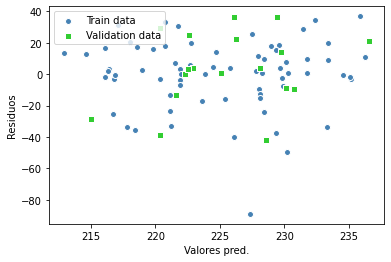

In [154]:
train_mse = mean_squared_error(y_train, y_train_predict)
val_mse = mean_squared_error(y_val, y_val_predict)
r2_train = r2_score(y_train, y_train_predict)
r2_val = r2_score(y_val, y_val_predict)
print('R^2 train: %.3f, test: %.3f' %(r2_train, r2_val))
print('MSE train: %.3f, test: %.3f' %(train_mse, val_mse))
pyplot.scatter(y_train_predict, y_train_predict-y_train, c='steelblue', marker='o', edgecolor='white',
           label='Train data')
pyplot.scatter(y_val_predict, y_val_predict-y_val, c='limegreen', marker='s', edgecolor='white',
           label='Validation data')
pyplot.xlabel('Valores pred.')
pyplot.ylabel('Residuos')
pyplot.legend(loc='upper left')
pyplot.show()

In [155]:
'''
Notas de la elección del modelo:
Dado el marco de tiempo y las posibilidades del ejercicio se optó por utilizar un modelo de regresión de mínimos cuadrados
ordinarios. Siendo un trabajo de series de tiempo se podría haber optado por otros modelos como vectores autorregresivos u 
otros "algoritmos". Sin embargo, esto requería de desestacionalizar las variables (ya sea por filtros o sacando primeras, 
segundas diferencias o lo que correspondiera). De la misma forma, utilizar otros "algoritmos" hubiese implicada optimizar
hyperparámetros, normalización de variables, etc. Según correspondiera. También hubiese sido correcto probar varios modelos
Todos estos son pasos esenciales en el desarrollo de modelos predictivos y que sin duda son conocimientos que se requieren 
de un data scientist. Pero estas son tareas de mayor complejidad y que requieren mayor tiempo del que se le puede destinar a
una prueba de conocimientos. Tomando esto en consideración y el viejo lema que se enseña en econometría de que el coeficiente
de MCO por definición es consistente, insesgado y minimiza el error cuadrático medio, se optó por utilizarlo.

Sobre las variables seleccionadas:
Lo ideal hubiese sido utilizar variables indicativas de los insumos para la producción y demanda de leche 
(IMACEC sectorial, PIB silvopecuario, precio del dólar, precio de bencinas, salario mínimo, etc.), sin embargo muchas de 
estas variables tenían pocos datos para cruzar con las series del precio de la leche. Por lo que finalmente se optó por 
las precipitaciones y el PIB agropecuario, que permitían maximizar la cantidad de observaciones posibles para entrenar el modelo.
La idea era predecir el precio mensual de la leche, dada la disponibilidad de las series y su temporalidad, se utilizaron los 
datos mensuales y para las variables predictoras se les rezagó los valores en un mes. De manera que la publicación de los 
indicadores del mes actual predijera el precio del próximo mes.


Evaluación del modelo:
En el caso de las métricas para evaluar los modelos de regresión de MCO, se suelen utilizar el error cuadrático medio (o MSE 
en inglés), que es la media de la diferencia cuadrática del valor predicho y el real. Métrica que sirve para ver la magnitud de 
los residuos e ir comparando mejoras dentro del mismo modelo. Pero esta métrica no está normalizada, por lo que también se puede
utilizar el R^2. 
El R^2  es el porcentaje de la variación en la variable de respuesta que se explica por un modelo. Va de 0 a 1, donde 1 implica
que el modelo explica el 100% de la variabilidad de la respuesta.
En el caso de nuestro modelo, este es cercano a 0. Por lo que se puede decir que es un modelo que explica muy poco. Algunas razones
para esto tiene que ver con la naturaleza de las variables (series de tiempo) y la adecuación de un modelo de MCO. Luego, las
variables necesitaban ser desestacionalizadas y normalizadas. También hay un problema con la cantidad de observaciones que se 
disponían para entrenar y probar el modelo. Finalmente, la elección del "algoritmo" y sus hiperparámetros tienen una gran 
incidencia. Incluso en regresiones de MCO existen varias formas de "regularizar" y poner restricciones a los coeficientes
para lidiar con problemas de falta de datos o de sobreajuste.

Finalmente, la predicción de precios de insumos tiene muchísimos tipos de fines, financieros (especulación), operativos (estimación
de costos y demanda), etc. Si dado shocks en precios de insumos, o en este caso, en las precipitaciones, pueden ayudar a determinar
el precio de un bien final con anticipación se puede adelantar y ajustar la producción de manera que minimizar los impactos ambientales
y de costos. 
Saliendo de modelos particulares para predecir precios y entrando a un área más amplia del Machine Learning. Estos modelos 
permiten evidenciar problemas y costos derivados del cambio climático, como por ejemplo, las sequías.
Un combate más directo sería estudiar, utilizando este tipo de modelos, las diferentes variables que afectan el clima, de manera 
que podemos entender como minimizar los impactos, o incluso, empezar a mitigar y revertir los efectos.

'''

'\nNotas de la elección del modelo:\nDado el marco de tiempo y las posibilidades del ejercicio se optó por utilizar un modelo de regresión de mínimos cuadrados\nordinarios. Siendo un trabajo de series de tiempo se podría haber optado por otros modelos como vectores autorregresivos u \notros "algoritmos". Sin embargo, esto requería de desestacionalizar las variables (ya sea por filtros o sacando primeras, \nsegundas diferencias o lo que correspondiera). De la misma forma, utilizar otros "algoritmos" hubiese implicada optimizar\nhyperparámetros, normalización de variables, etc. Según correspondiera. También hubiese sido correcto probar varios modelos\nTodos estos son pasos esenciales en el desarrollo de modelos predictivos y que sin duda son conocimientos que se requieren \nde un data scientist. Pero estas son tareas de mayor complejidad y que requieren mayor tiempo del que se le puede destinar a\nuna prueba de conocimientos. Tomando esto en consideración y el viejo lema que se enseña en